In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.feature_selection import SelectKBest,chi2,RFECV
import seaborn as sns
import time

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/precision'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/precision/data.csv
/content/drive/My Drive/precision/precision.ipynb


In [3]:
df = pd.read_csv("/content/drive/My Drive/precision/data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Separating target from features
col = df.columns
y = df['diagnosis']
X = col_drop = ['id','diagnosis','Unnamed: 32']
x = df.drop(col_drop,axis=1)

Number of Benign Tumors:  357
Number of Malign Tumors:  212


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


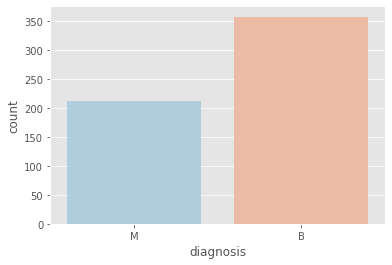

In [5]:
#Plot Diagnosis Distribution
ax = sns.countplot(y,label="Count",palette="RdBu_r")
B,M = y.value_counts()
print("Number of Benign Tumors: ",B)
print("Number of Malign Tumors: ",M)

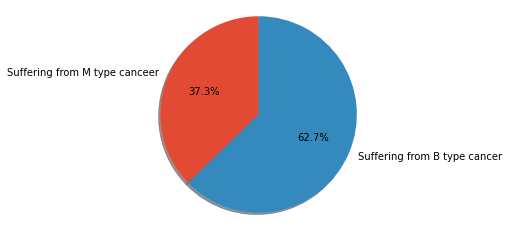

In [6]:
fig1, ax1 = plt.subplots()
ax1.pie([M,B], labels=["Suffering from M type canceer","Suffering from B type cancer"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [9]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
# Removing cols by looking at heatmap (Minimal Feature selection)
from sklearn.model_selection import train_test_split
drop_col = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean',
            'radius_se','perimeter_se','compactness_se','concave points_se',
            'radius_worst','perimeter_worst','area_worst','texture_worst','compactness_worst','concave points_worst']
df = x.drop(drop_col,axis=1)
x_train1,x_test1,y_train1,y_test1 = train_test_split(df,y,test_size=0.3,random_state=42)


In [11]:
#Univariate feature selection
select_feature = SelectKBest(chi2,k=10).fit(x_train1,y_train1)
x_train2 = select_feature.transform(x_train1)
x_test2 = select_feature.transform(x_test1)

In [12]:
#Importing Libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import time
#from BorutaShap import BorutaShap
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,plot_confusion_matrix,accuracy_score
from sklearn.feature_selection import SelectKBest,chi2,RFECV
from sklearn.decomposition import PCA

Accuracy:  0.9707602339181286


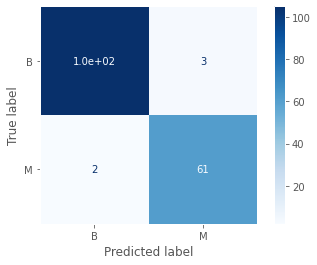

In [13]:
#XGBost using Univariate feature selection
model2 = xgb.XGBClassifier(random_state=42)
model2.fit(x_train2,y_train1)
y_pred2 = model2.predict(x_test2)
print("Accuracy: ",accuracy_score(y_test1,y_pred2))
plot_confusion_matrix(model2,x_test2,y_test1,cmap=plt.cm.Blues)
plt.grid(False)

MPLC Accuracy:  0.8713450292397661


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


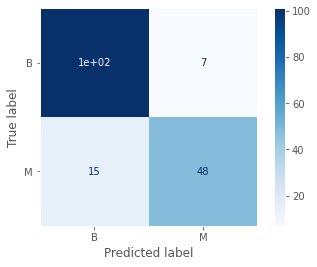

In [14]:
#MLPClassifier using Univariate feature selection
from sklearn.neural_network import MLPClassifier
model3 = MLPClassifier(random_state=42)
model3.fit(x_train2,y_train1)
y_pred3 = model3.predict(x_test2)
print("MPLC Accuracy: ",accuracy_score(y_test1,y_pred3))
plot_confusion_matrix(model3,x_test2,y_test1,cmap=plt.cm.Blues)
plt.grid(False)

LogisticRegression Accuracy:  0.9883040935672515


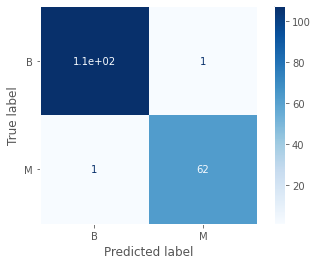

In [15]:
#Logistic Regression using Univariate feature selection
model4 = LogisticRegression(C=500,penalty='l2',max_iter=500)
model4.fit(x_train2,y_train1)
y_pred4 = model4.predict(x_test2)
print("LogisticRegression Accuracy: ",accuracy_score(y_test1,y_pred4))
plot_confusion_matrix(model4,x_test2,y_test1,cmap=plt.cm.Blues)
plt.grid(False)

 SVM Accuracy:  0.9473684210526315


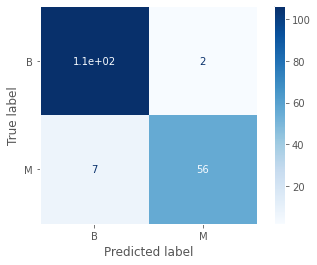

In [16]:
#SVM using Univariate feature selection
model5 = SVC(C=500,gamma='scale',kernel='poly',degree=1)
model5.fit(x_train2,y_train1)
y_pred5 = model5.predict(x_test2)
print(" SVM Accuracy: ",accuracy_score(y_test1,y_pred5))
plot_confusion_matrix(model5,x_test2,y_test1,cmap=plt.cm.Blues)
plt.grid(False)

RandomForest Accuracy:  0.9707602339181286


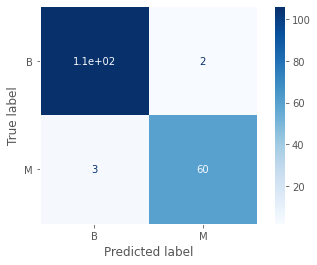

In [17]:
#Random Forest Classifier using Univariate Linear Regression
model6 = RandomForestClassifier(n_estimators=1000,max_depth=20,criterion='entropy',bootstrap=True)
model6.fit(x_train2,y_train1)
y_pred6 = model6.predict(x_test2)
print("RandomForest Accuracy: ",accuracy_score(y_test1,y_pred6))
plot_confusion_matrix(model6,x_test2,y_test1,cmap=plt.cm.Blues)
plt.grid(False)

BernoulliNB Accuracy:  0.631578947368421


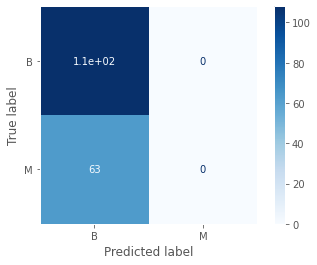

In [18]:
from sklearn.naive_bayes import BernoulliNB
model7 = BernoulliNB( alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
model7.fit(x_train2,y_train1)
y_pred7 = model7.predict(x_test2)
print("BernoulliNB Accuracy: ",accuracy_score(y_test1,y_pred7))
plot_confusion_matrix(model7,x_test2,y_test1,cmap=plt.cm.Blues)
plt.grid(False)

GaussianNB Accuracy:  0.9298245614035088


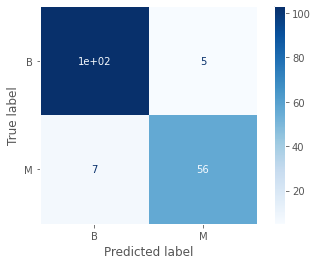

In [19]:
#Naive Bayes Classifier using Univariate feature selection
model8 = GaussianNB()
model8.fit(x_train2,y_train1)
y_pred8 = model8.predict(x_test2)
print("GaussianNB Accuracy: ",accuracy_score(y_test1,y_pred8))
plot_confusion_matrix(model8,x_test2,y_test1,cmap=plt.cm.Blues)
plt.grid(False)

SGDC Accuracy:  0.8538011695906432


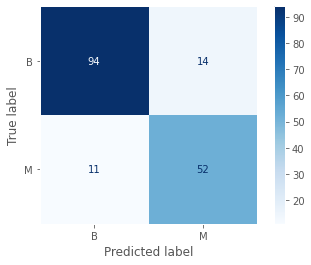

In [20]:
#sgd classifier
from sklearn.linear_model import SGDClassifier
model9 = SGDClassifier(random_state=42)
model9.fit(x_train2,y_train1)
y_pred9 = model9.predict(x_test2)
print("SGDC Accuracy: ",accuracy_score(y_test1,y_pred9))
plot_confusion_matrix(model9,x_test2,y_test1,cmap=plt.cm.Blues)
plt.grid(False)

LDA Accuracy:  0.9415204678362573


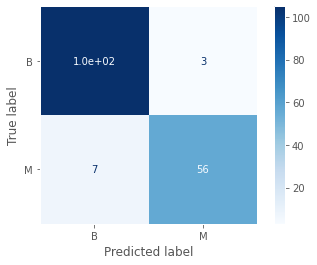

In [21]:
#lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model10 = LinearDiscriminantAnalysis()
model10.fit(x_train2,y_train1)
y_pred10 = model10.predict(x_test2)
print("LDA Accuracy: ",accuracy_score(y_test1,y_pred10))
plot_confusion_matrix(model10,x_test2,y_test1,cmap=plt.cm.Blues)
plt.grid(False)

In [22]:
#X = df.drop(columns=['id','Unnamed: 32','diagnosis'])

In [23]:
#X.head()

In [24]:
!pip install catboost

     |████████████████████████████████| 66.2MB 70kB/s 


In [213]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from  sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import  XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis( ).fit(x_train1,y_train1)   
sgd = SGDClassifier(random_state=42).fit(x_train1,y_train1)    
mlp = MLPClassifier(random_state=42).fit(x_train1,y_train1)  #neural Network model  
bnb = BernoulliNB().fit(x_train1,y_train1)                 
lgr = LogisticRegression().fit(x_train1,y_train1)           
dtc = DecisionTreeClassifier(random_state=0).fit(x_train1,y_train1)  
rfc = RandomForestClassifier(n_estimators= 250,random_state=0).fit(x_train1,y_train1)    
xgb = XGBClassifier().fit(x_train1,y_train1)            
svm = SVC(C=500,gamma='scale',kernel='poly',degree=1).fit(x_train1,y_train1)  
gnb = GaussianNB().fit(x_train1,y_train1)    
KNN = KNeighborsClassifier(n_neighbors=3).fit(x_train1,y_train1)    
cat = CatBoostClassifier(iterations=70, learning_rate= 1, depth=2).fit(x_train1,y_train1)    
lgb = lgb.LGBMClassifier().fit(x_train1,y_train1)    
abc = AdaBoostClassifier(n_estimators=200,random_state=0).fit(x_train1,y_train1)  

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0:	learn: 0.3553461	total: 918us	remaining: 63.4ms
1:	learn: 0.2321602	total: 2.15ms	remaining: 73.3ms
2:	learn: 0.2004692	total: 3.04ms	remaining: 67.9ms
3:	learn: 0.1676235	total: 3.88ms	remaining: 64.1ms
4:	learn: 0.1432719	total: 4.74ms	remaining: 61.6ms
5:	learn: 0.1260884	total: 5.65ms	remaining: 60.3ms
6:	learn: 0.1168302	total: 6.54ms	remaining: 58.9ms
7:	learn: 0.1157376	total: 7.45ms	remaining: 57.7ms
8:	learn: 0.1053044	total: 8.27ms	remaining: 56.1ms
9:	learn: 0.0988547	total: 9.1ms	remaining: 54.6ms
10:	learn: 0.0926631	total: 9.95ms	remaining: 53.4ms
11:	learn: 0.0860368	total: 10.8ms	remaining: 52.4ms
12:	learn: 0.0842516	total: 11.8ms	remaining: 51.7ms
13:	learn: 0.0791956	total: 12.6ms	remaining: 50.5ms
14:	learn: 0.0769490	total: 13.5ms	remaining: 49.4ms
15:	learn: 0.0759269	total: 14.3ms	remaining: 48.4ms
16:	learn: 0.0750448	total: 15.3ms	remaining: 47.7ms
17:	learn: 0.0747457	total: 16.2ms	remaining: 46.8ms
18:	learn: 0.0706585	total: 17.1ms	remaining: 45.8ms
19:	l

In [214]:
lda_pred= lda.predict(x_test1)
sgd_pred = sgd.predict(x_test1)
mlp_pred = mlp.predict(x_test1)
bnb_pred = bnb.predict(x_test1)
lgr_pred = lgr.predict(x_test1)
dtc_pred = dtc.predict(x_test1)
rfc_pred = rfc.predict(x_test1)
xgb_pred = xgb.predict(x_test1)
svm_pred = svm.predict(x_test1)
gnb_pred = gnb.predict(x_test1)
knn_pred = KNN.predict(x_test1)
cat_pred = cat.predict(x_test1)
lgb_pred =lgb.predict(x_test1)
abc_pred = abc.predict(x_test1)


In [215]:
names = ['LDA','SGD','MLP','BernouilliNB','LogisticRegression','Tree','RandomForest','XGBoost','SVM','Gaussian NB','KNN','Catboost','Lightboost','Adaboost']
models =[accuracy_score(y_test1,lda_pred)*100,accuracy_score(y_test1,sgd_pred)*100,accuracy_score(y_test1,mlp_pred)*100,accuracy_score(y_test1,bnb_pred)*100,accuracy_score(y_test1,lgr_pred)*100,accuracy_score(y_test1,dtc_pred)*100,accuracy_score(y_test1,rfc_pred)*100,accuracy_score(y_test1,xgb_pred)*100,accuracy_score(y_test1,svm_pred)*100,accuracy_score(y_test1,gnb_pred)*100,accuracy_score(y_test1,knn_pred)*100,accuracy_score(y_test1,cat_pred)*100,accuracy_score(y_test1,lgb_pred)*100,accuracy_score(y_test1,abc_pred)*100]
print("The accuracy is LDA",accuracy_score(y_test1,lda_pred)*100)
print("The accuracy is SGDClassifier",accuracy_score(y_test1,sgd_pred)*100)
print("The accuracy is MLPClassifier(Neural Network)",accuracy_score(y_test1,mlp_pred)*100)
print("The accuracy is BernouilliNB",accuracy_score(y_test1,bnb_pred)*100)
print("The accuracy is LogisticRegressioin",accuracy_score(y_test1,lgr_pred)*100)
print("The accuracy is Tree",accuracy_score(y_test1,dtc_pred)*100)
print("The accuracy is RandomForest",accuracy_score(y_test1,rfc_pred)*100)
print("The accuracy is XGBoost",accuracy_score(y_test1,xgb_pred)*100)
print("The accuracy is SVM",accuracy_score(y_test1,svm_pred)*100)
print("The accuracy is Gaussian NB", accuracy_score(y_test1,gnb_pred)*100)
print("The accuaracy is KNN(K-nearest neighbors)", accuracy_score(y_test1,knn_pred)*100)
print("The accuracy is Catboost",accuracy_score(y_test1,cat_pred)*100)
print("The accuracy is Lightboost",accuracy_score(y_test1,lgb_pred)*100)
print("The accuracy is Adaboost",accuracy_score(y_test1,abc_pred)*100)

The accuracy is LDA 95.32163742690058
The accuracy is SGDClassifier 84.7953216374269
The accuracy is MLPClassifier(Neural Network) 88.88888888888889
The accuracy is BernouilliNB 63.1578947368421
The accuracy is LogisticRegressioin 94.73684210526315
The accuracy is Tree 91.81286549707602
The accuracy is RandomForest 97.07602339181285
The accuracy is XGBoost 97.6608187134503
The accuracy is SVM 94.73684210526315
The accuracy is Gaussian NB 92.98245614035088
The accuaracy is KNN(K-nearest neighbors) 91.22807017543859
The accuracy is Catboost 98.24561403508771
The accuracy is Lightboost 95.90643274853801
The accuracy is Adaboost 95.90643274853801


In [28]:
print(models)
print(names)

[95.32163742690058, 84.7953216374269, 88.88888888888889, 63.1578947368421, 94.73684210526315, 91.81286549707602, 97.07602339181285, 97.6608187134503, 94.73684210526315, 92.98245614035088, 90.64327485380117, 95.32163742690058, 95.90643274853801, 95.32163742690058]
['LDA', 'SGD', 'MLP', 'BernouilliNB', 'LogisticRegression', 'Tree', 'RandomForest', 'XGBoost', 'SVM', 'Gaussian NB', 'KNN', 'Catboost', 'Lightboost', 'Adaboost']


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


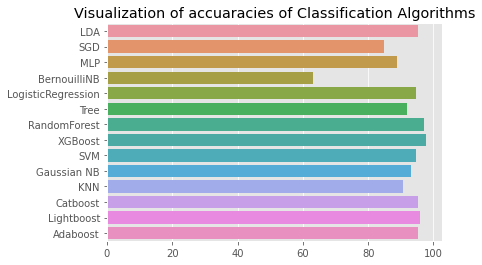

In [29]:
sns.set_colorcodes=True
plt.title('Visualization of accuaracies of Classification Algorithms')
sns.barplot(models,names)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


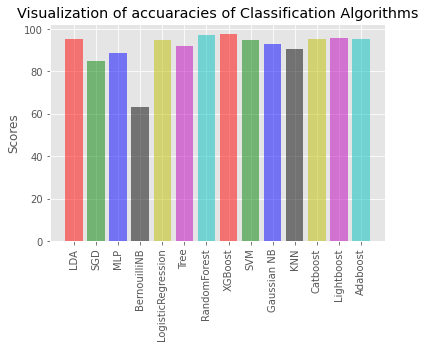

In [30]:
my_colors = 'rgbkymc'
y_pos = np.arange(len(names))
plt.bar(y_pos, models, align='center', alpha=0.5,color=my_colors)
plt.xticks(y_pos, names,rotation=90)
plt.ylabel('Scores')

plt.title('Visualization of accuaracies of Classification Algorithms')
plt.show()

There is a highest accuracy of 98.2%